# Rainfall Weather Forecasting

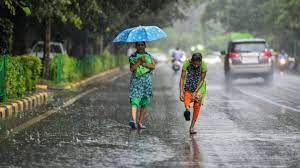

## Problem Statement:
Rain Prediction –Weather forecasting
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. 

# Predictions to be made

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.



### Importing some important libraries

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset


In [138]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df.head(25)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [139]:
df.shape

(8425, 23)

### Dataset Description



Number of columns: 23

Date - The date of observation

Location -The common name of the location of the weather station

MinTemp -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall -The amount of rainfall recorded for the day in mm

Evaporation -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am.

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [141]:
df.nunique

<bound method DataFrame.nunique of             Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

    

### Checking for null values


In [142]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

There are a lot of null values in the columns.

### Visualizing the null values

<AxesSubplot:>

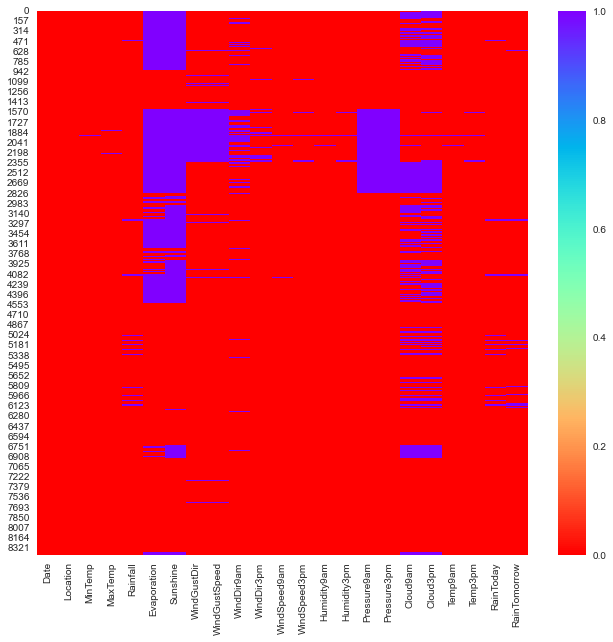

In [143]:

plt.figure(figsize=(11,10))
sns.heatmap(df.isna(), cmap='rainbow_r')

### Checking for blank spaces, random characters in each column.

In [144]:

search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in df:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((df[c] == s).sum())

  in Date =  0
? in Date =  0
- in Date =  0
 ? in Date =  0
 - in Date =  0
?  in Date =  0
-  in Date =  0
 ?  in Date =  0
 -  in Date =  0
NA in Date =  0
N/A in Date =  0
 NA in Date =  0
 N/A in Date =  0
  in Location =  0
? in Location =  0
- in Location =  0
 ? in Location =  0
 - in Location =  0
?  in Location =  0
-  in Location =  0
 ?  in Location =  0
 -  in Location =  0
NA in Location =  0
N/A in Location =  0
 NA in Location =  0
 N/A in Location =  0
  in MinTemp =  0
? in MinTemp =  0
- in MinTemp =  0
 ? in MinTemp =  0
 - in MinTemp =  0
?  in MinTemp =  0
-  in MinTemp =  0
 ?  in MinTemp =  0
 -  in MinTemp =  0
NA in MinTemp =  0
N/A in MinTemp =  0
 NA in MinTemp =  0
 N/A in MinTemp =  0
  in MaxTemp =  0
? in MaxTemp =  0
- in MaxTemp =  0
 ? in MaxTemp =  0
 - in MaxTemp =  0
?  in MaxTemp =  0
-  in MaxTemp =  0
 ?  in MaxTemp =  0
 -  in MaxTemp =  0
NA in MaxTemp =  0
N/A in MaxTemp =  0
 NA in MaxTemp =  0
 N/A in MaxTemp =  0
  in Rainfall =  0
? in Ra

There are no blank spaces, random characters in columns of the dataset.

### Total of null values in each column is less than 1% of total data . Therefore dropping those rows.

In [145]:
df.dropna(inplace=True)


In [146]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [147]:
df.shape

(3790, 23)

There are no more null values.


In [148]:

df.reset_index(inplace=True,drop=True) # resetting the index

### Getting the basic summary and statistical information of the data.

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3790 non-null   object 
 1   Location       3790 non-null   object 
 2   MinTemp        3790 non-null   float64
 3   MaxTemp        3790 non-null   float64
 4   Rainfall       3790 non-null   float64
 5   Evaporation    3790 non-null   float64
 6   Sunshine       3790 non-null   float64
 7   WindGustDir    3790 non-null   object 
 8   WindGustSpeed  3790 non-null   float64
 9   WindDir9am     3790 non-null   object 
 10  WindDir3pm     3790 non-null   object 
 11  WindSpeed9am   3790 non-null   float64
 12  WindSpeed3pm   3790 non-null   float64
 13  Humidity9am    3790 non-null   float64
 14  Humidity3pm    3790 non-null   float64
 15  Pressure9am    3790 non-null   float64
 16  Pressure3pm    3790 non-null   float64
 17  Cloud9am       3790 non-null   float64
 18  Cloud3pm

In [150]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,14.071029,24.733483,2.451768,5.292533,7.852744,41.203958,16.377836,20.099208,63.683641,49.435620,1017.488047,1015.037836,4.116623,4.214776,18.963536,23.226201
std,5.161176,6.068364,7.772025,3.642341,3.816696,13.857829,9.516511,8.719867,16.273443,17.673797,6.560724,6.485755,2.773039,2.647355,5.528374,5.929694
min,-0.700000,10.800000,0.000000,0.000000,0.000000,13.000000,2.000000,2.000000,11.000000,6.000000,992.900000,990.800000,0.000000,0.000000,4.500000,9.400000
25%,10.200000,20.300000,0.000000,2.800000,5.200000,31.000000,9.000000,13.000000,53.000000,38.000000,1013.100000,1010.400000,1.000000,1.000000,14.900000,19.100000
50%,14.000000,24.100000,0.000000,4.600000,8.900000,39.000000,15.000000,20.000000,64.000000,49.000000,1017.400000,1015.050000,5.000000,5.000000,18.700000,22.700000
75%,17.900000,29.200000,0.800000,7.000000,10.800000,50.000000,22.000000,26.000000,75.000000,61.000000,1021.700000,1019.300000,7.000000,7.000000,23.200000,27.300000
max,28.500000,43.600000,168.400000,37.000000,13.900000,102.000000,61.000000,52.000000,99.000000,98.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000


<AxesSubplot:>

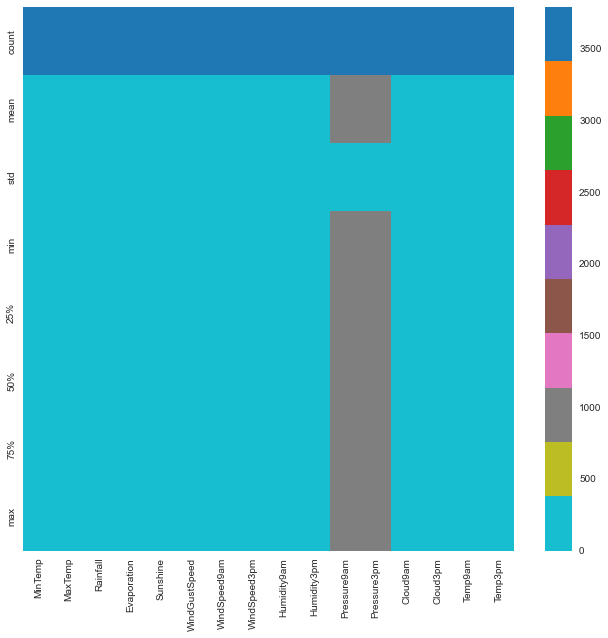

In [151]:
#Checking with the help of heatmap
plt.figure(figsize=(11,10))
sns.heatmap(df.describe(), cmap='tab10_r')

### Dropping the columns with low effect on predictions

In [152]:
# Dropping the irrelevant column 
df.drop("Location", axis=1 ,inplace=True)


df.drop("Evaporation", axis=1 ,inplace=True)

df.drop("Sunshine", axis=1 ,inplace=True)

In [153]:
df

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-03-10,19.8,27.1,24.4,ESE,35.0,SW,ESE,17.0,22.0,83.0,60.0,1018.9,1017.9,6.0,6.0,22.0,26.0,Yes,Yes
1,2009-03-11,18.7,25.6,6.8,E,33.0,SW,S,17.0,13.0,85.0,90.0,1020.7,1020.1,4.0,7.0,21.0,20.9,Yes,Yes
2,2009-03-12,16.5,25.5,16.8,WSW,19.0,WSW,ESE,6.0,9.0,84.0,65.0,1021.5,1020.1,5.0,7.0,21.0,24.5,Yes,No
3,2009-03-13,18.5,26.9,0.0,ENE,30.0,SW,ENE,7.0,20.0,68.0,60.0,1018.9,1016.6,2.0,5.0,23.3,26.4,No,No
4,2009-03-14,18.2,28.2,0.0,NNE,50.0,NNW,NE,13.0,35.0,67.0,68.0,1016.3,1012.8,1.0,1.0,24.0,25.9,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,2012-11-06,25.2,34.5,3.0,NNE,39.0,N,NNE,11.0,22.0,66.0,46.0,1011.3,1007.9,7.0,7.0,29.6,33.4,Yes,No
3786,2012-11-07,26.2,33.3,0.0,N,54.0,ENE,E,13.0,13.0,66.0,93.0,1010.4,1006.8,4.0,8.0,30.2,25.2,No,Yes
3787,2012-11-08,24.9,32.8,20.4,WNW,37.0,NNE,NW,13.0,20.0,72.0,55.0,1009.9,1006.2,4.0,6.0,29.5,32.0,Yes,No
3788,2012-11-09,25.5,33.1,0.0,SSE,37.0,E,WSW,20.0,13.0,62.0,58.0,1011.1,1006.9,7.0,7.0,28.6,31.5,No,No


### Exploratory Data Analysis

In [154]:
df['Date'].unique() 

array(['2009-03-10', '2009-03-11', '2009-03-12', ..., '2012-08-16',
       '2012-09-28', '2012-11-10'], dtype=object)

In [155]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>],
       [<AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>,
        <AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>],
       [<AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>,
        <AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>],
       [<AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

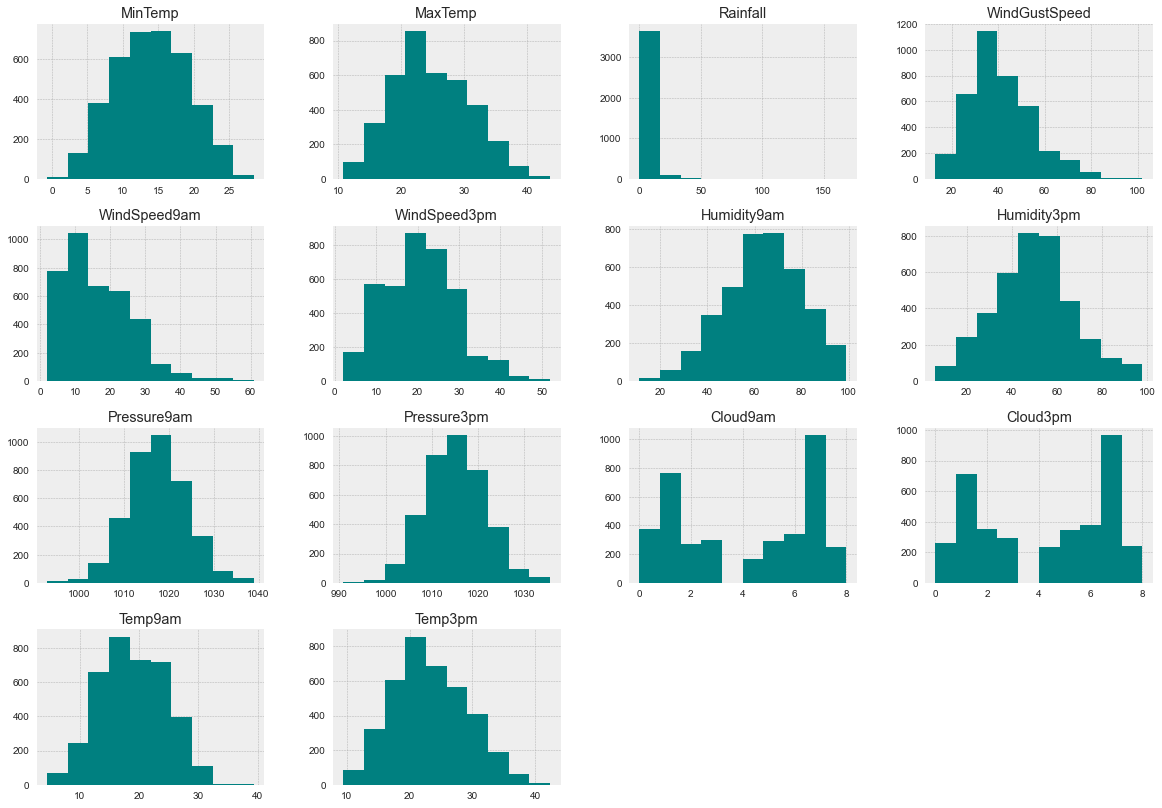

In [156]:
df.hist(figsize=(20,14), color ='teal')

In [157]:
df.value_counts()

Date        MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow
2016-04-26  14.4     23.4     0.0       ESE          31.0           NW          SE          9.0           19.0          82.0         63.0         1030.2       1027.1       4.0       1.0       19.0     22.5     No         No              2
2010-06-16  4.0      16.1     0.0       N            67.0           N           N           37.0          37.0          83.0         71.0         1022.5       1016.3       8.0       8.0       7.8      13.8     No         No              2
2010-06-06  8.9      15.7     16.8      S            37.0           WSW         S           11.0          20.0          93.0         65.0         1023.1       1023.3       7.0       5.0       10.1     14.8     Yes        Yes             2
2010-06-07  8.3      13.6     4.8       W        

In [158]:
df['RainToday'].unique()

array(['Yes', 'No'], dtype=object)

In [159]:
df['RainToday'].value_counts()

No     2901
Yes     889
Name: RainToday, dtype: int64

<AxesSubplot:xlabel='RainToday', ylabel='count'>

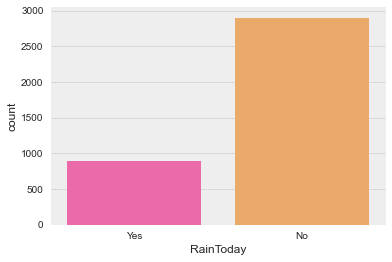

In [160]:
sns.countplot(df['RainToday'], palette="spring")

In [161]:
df['RainTomorrow'].unique()

array(['Yes', 'No'], dtype=object)

In [162]:
df['RainTomorrow'].value_counts()

No     2901
Yes     889
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

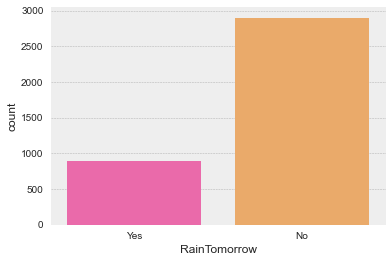

In [163]:
sns.countplot(df['RainTomorrow'], palette="spring")

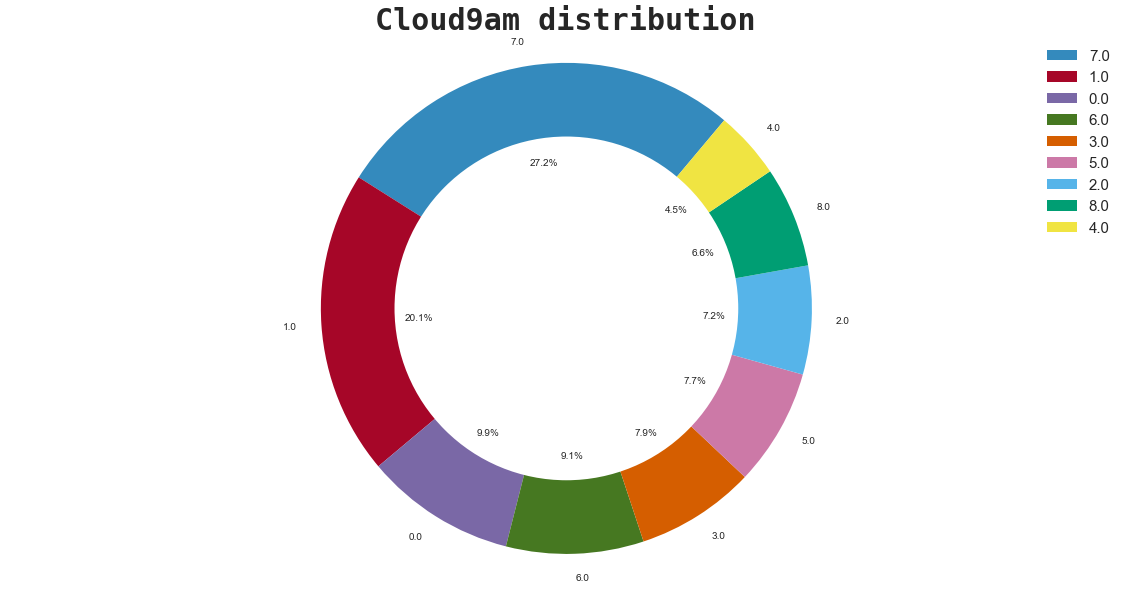

In [164]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'Cloud9am'
relation = df['Cloud9am'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Cloud9am distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()


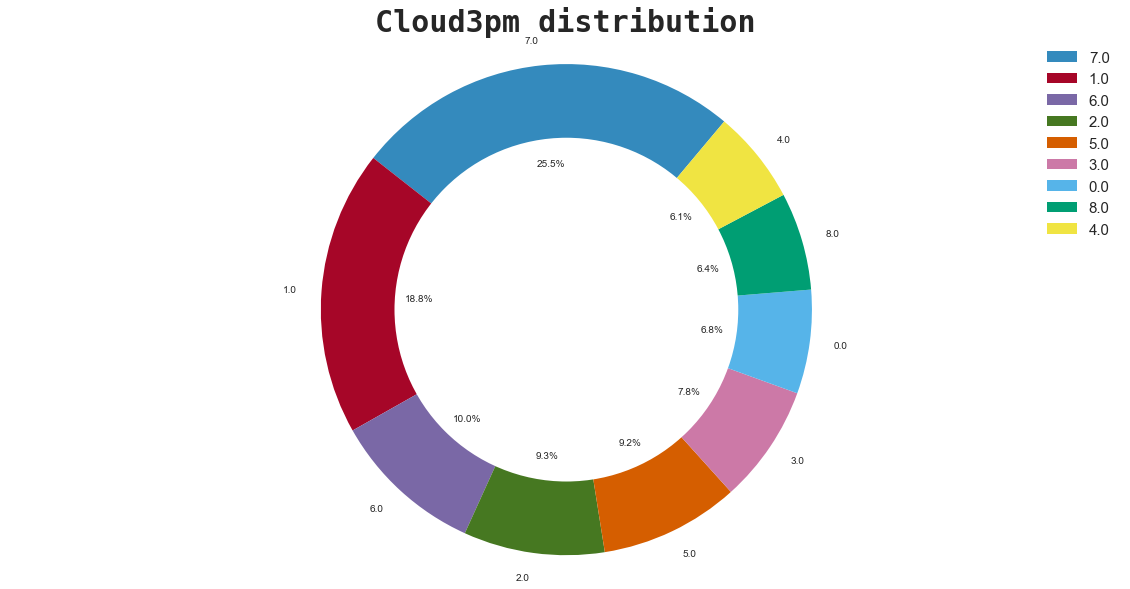

In [165]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'Cloud3am'
relation = df['Cloud3pm'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Cloud3pm distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

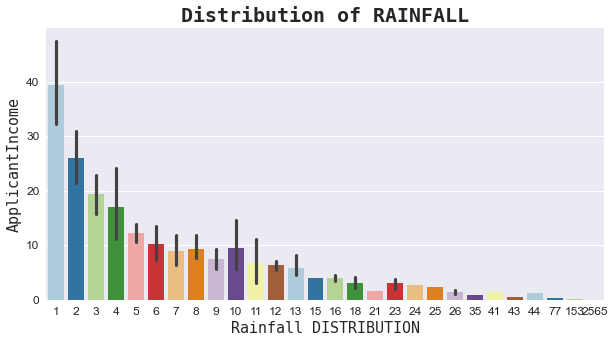

In [166]:
# Creating a barplot for 'Rainfall'

edu = df['Rainfall'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of RAINFALL', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Rainfall DISTRIBUTION', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('ApplicantIncome', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

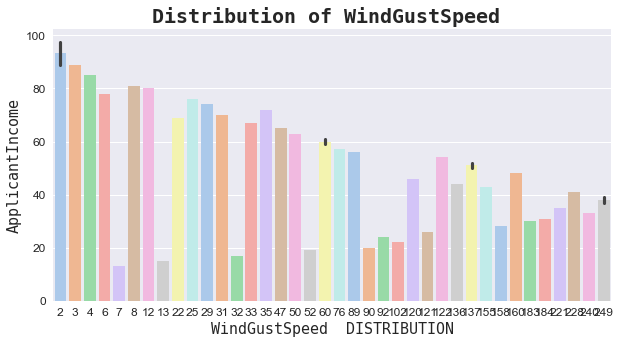

In [167]:
# Creating a barplot for 'WindGustSpeed '

edu = df['WindGustSpeed'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='pastel')
plt.title('Distribution of WindGustSpeed ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('WindGustSpeed  DISTRIBUTION', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('ApplicantIncome', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

<AxesSubplot:xlabel='WindGustSpeed', ylabel='count'>

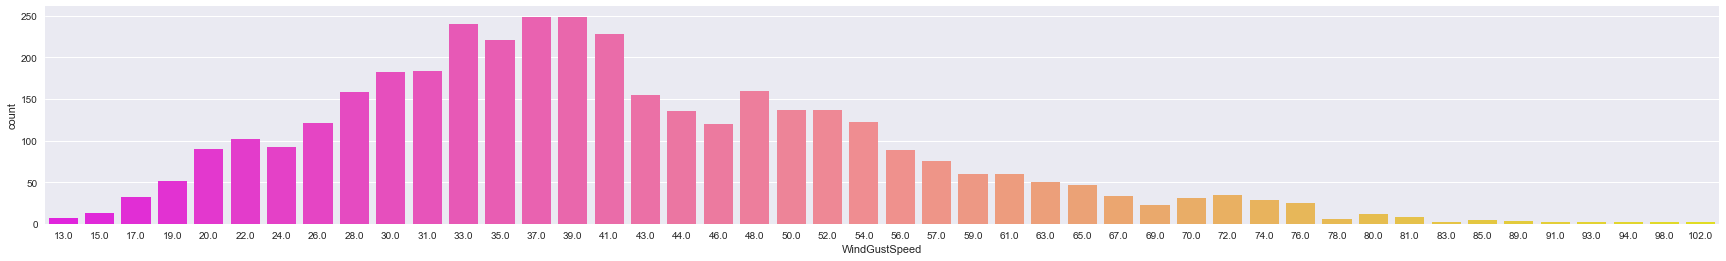

In [168]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(df['WindGustSpeed'], palette="spring")

In [169]:
df['WindGustDir'].value_counts()

N      449
E      408
SW     382
WSW    306
S      298
SSE    232
SSW    223
ENE    221
W      210
SE     195
NNE    185
ESE    176
NE     153
NW     125
WNW    119
NNW    108
Name: WindGustDir, dtype: int64

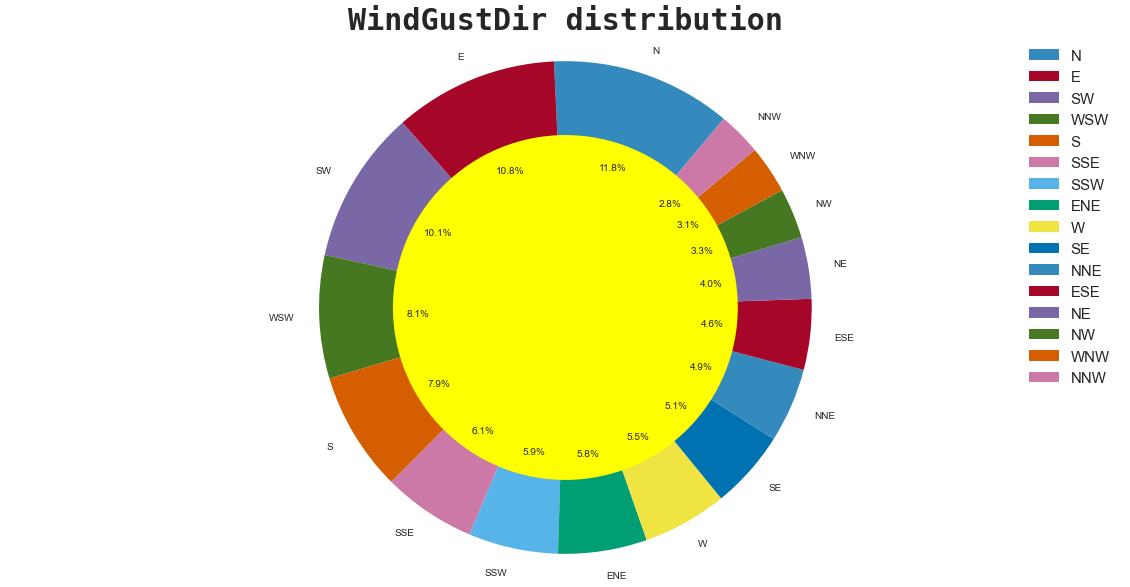

In [170]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for RFP['WindGustDir']
relation = df['WindGustDir'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='yellow')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('WindGustDir distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()


<AxesSubplot:title={'center':'Comparision between Pressure9am and Pressure3pm'}, xlabel='Pressure9am', ylabel='Pressure3pm'>

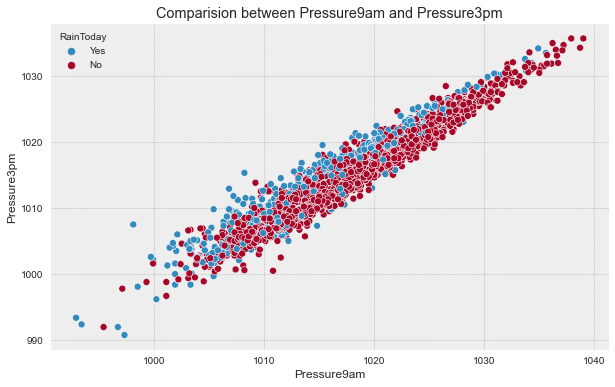

In [171]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Pressure9am and Pressure3pm')
sns.scatterplot(df['Pressure9am'],df['Pressure3pm'],hue=df['RainToday'])


<AxesSubplot:title={'center':'Comparision between Pressure9am and Pressure3pm'}, xlabel='Pressure9am', ylabel='Pressure3pm'>

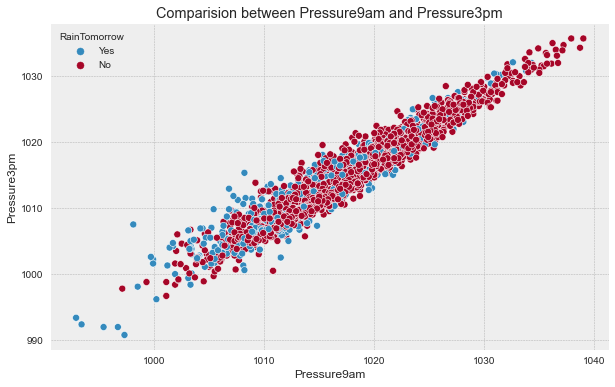

In [172]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Pressure9am and Pressure3pm')
sns.scatterplot(df['Pressure9am'],df['Pressure3pm'],hue=df['RainTomorrow'])

<AxesSubplot:title={'center':'Comparision between MinTemp and MaxTemp'}, xlabel='MinTemp', ylabel='MaxTemp'>

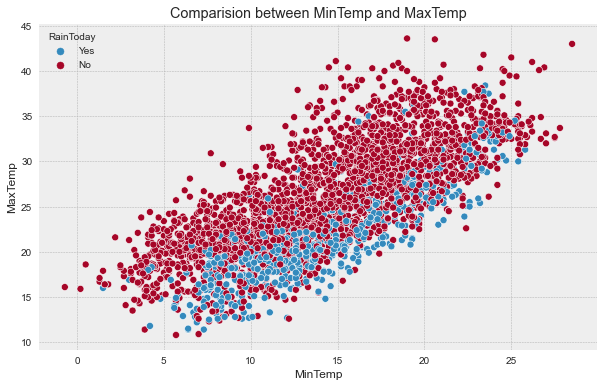

In [173]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between MinTemp and MaxTemp')
sns.scatterplot(df['MinTemp'],df['MaxTemp'],hue=df['RainToday'])

<AxesSubplot:title={'center':'Comparision between MinTemp and MaxTemp'}, xlabel='MinTemp', ylabel='MaxTemp'>

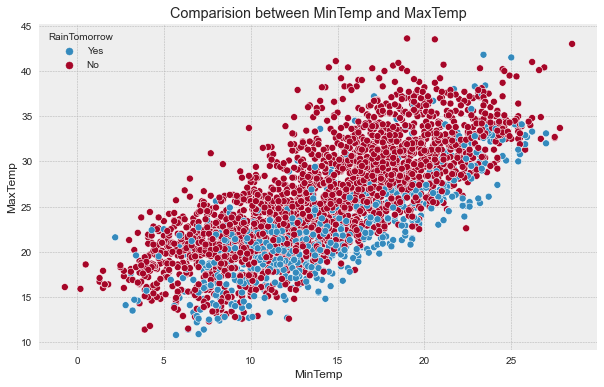

In [174]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between MinTemp and MaxTemp')
sns.scatterplot(df['MinTemp'],df['MaxTemp'],hue=df['RainTomorrow'])

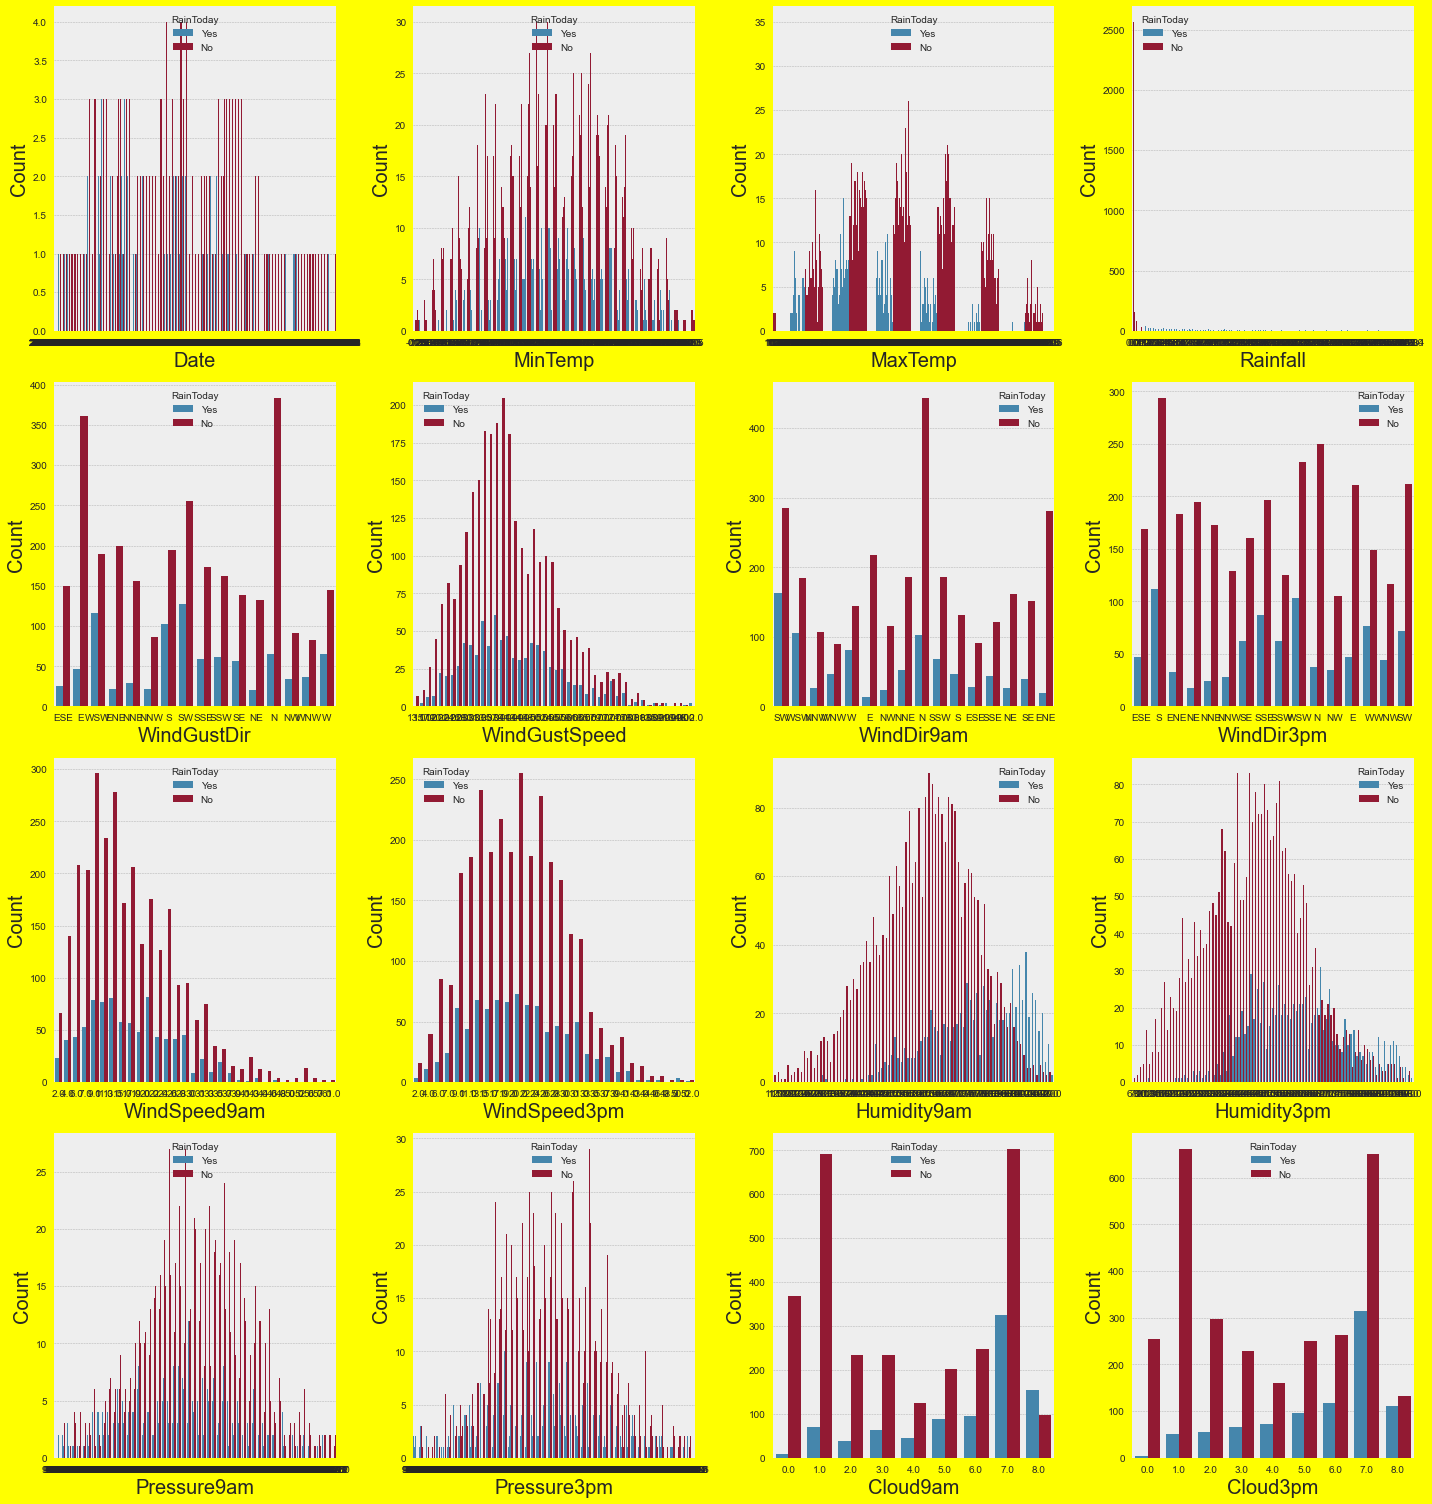

In [175]:
plt.figure(figsize=(20,21),facecolor='yellow')
plotnum=1
X = df[['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
y = df['RainToday']
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

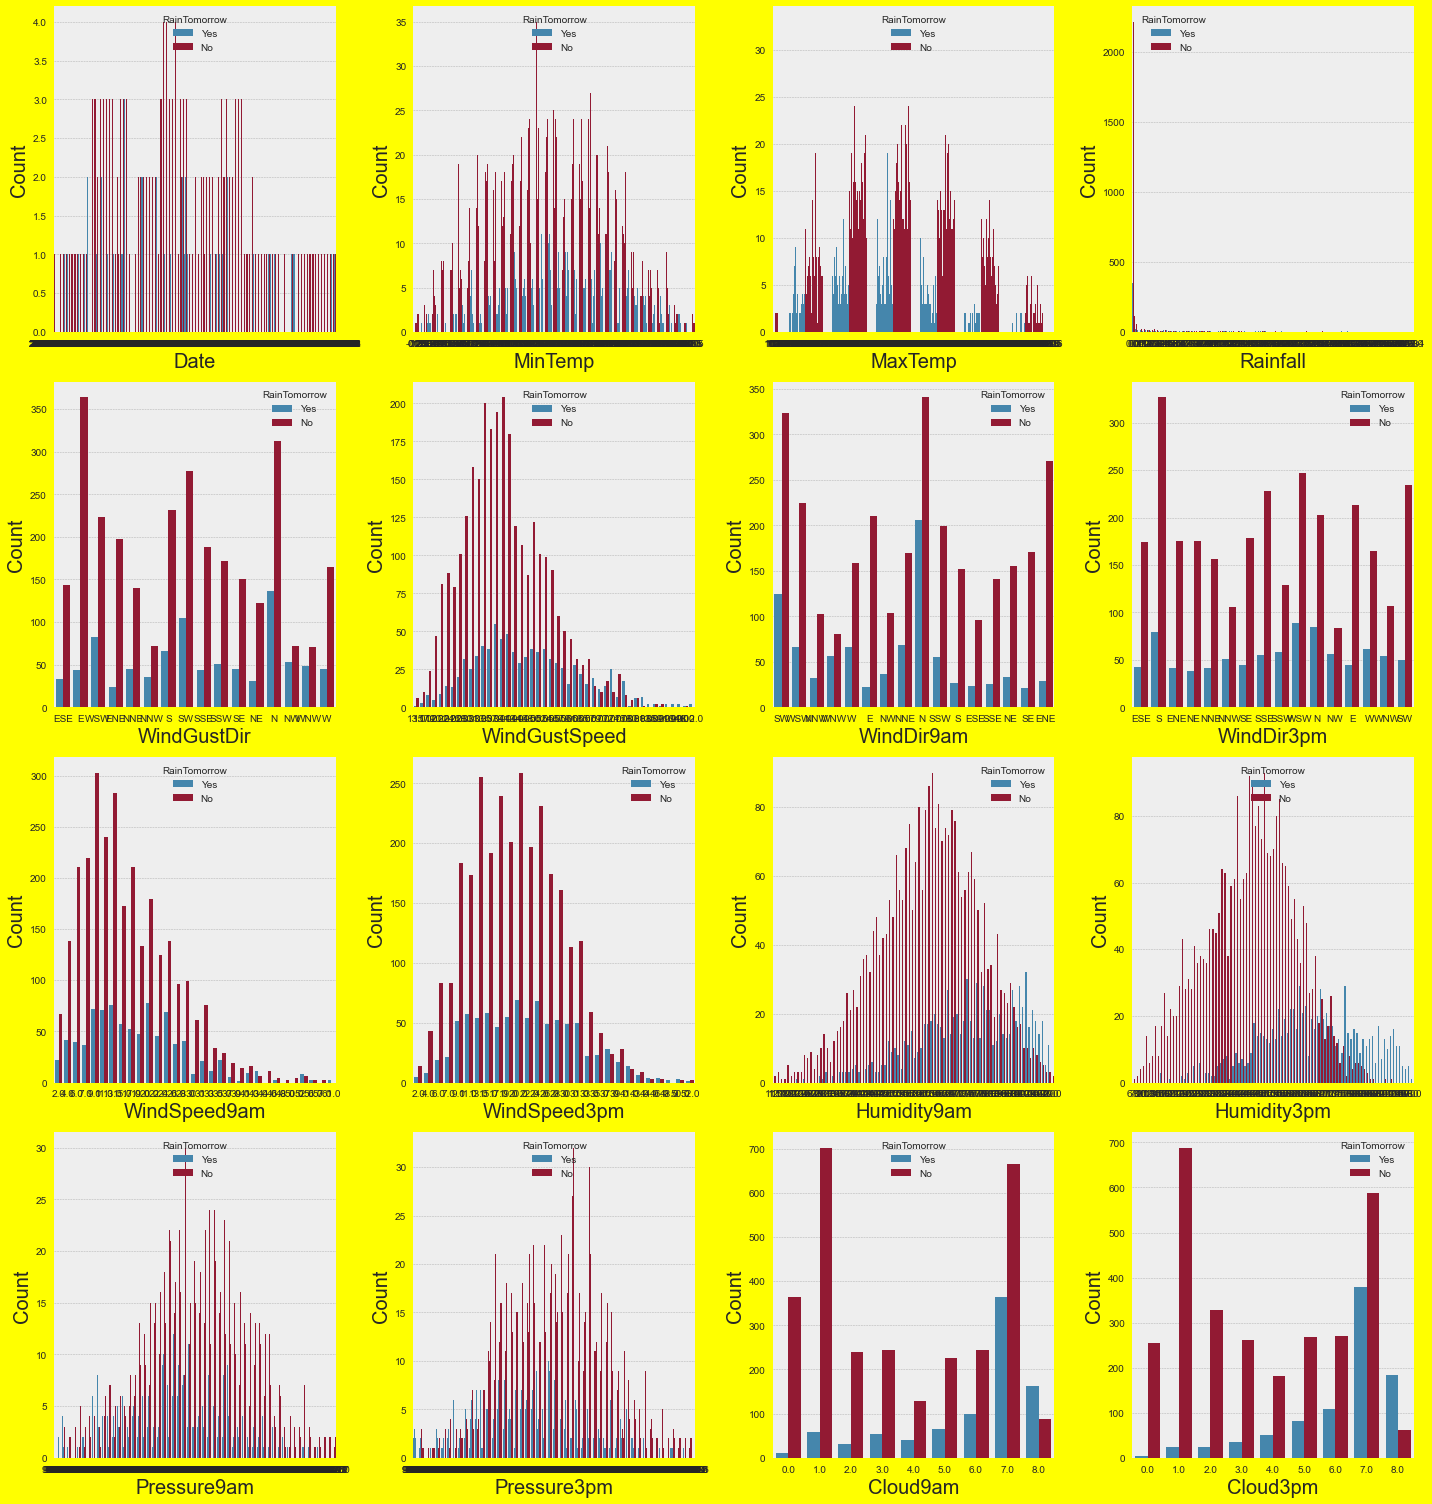

In [176]:
plt.figure(figsize=(20,21),facecolor='yellow')
plotnum=1
X = df[['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
y = df['RainTomorrow']
for col in X:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

### Correlation Analysis

In [177]:
df.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.740095,0.071315,0.135500,0.067415,0.092084,-0.078824,0.044881,-0.475074,-0.485264,0.124513,0.038071,0.861185,0.713084
MaxTemp,0.740095,1.000000,-0.120673,0.122229,0.059749,0.051563,-0.416987,-0.426143,-0.354381,-0.453176,-0.311638,-0.309302,0.890487,0.977768
Rainfall,0.071315,-0.120673,1.000000,0.073402,0.001508,0.016936,0.304251,0.267475,-0.120569,-0.067936,0.221206,0.191268,-0.050368,-0.126175
WindGustSpeed,0.135500,0.122229,0.073402,1.000000,0.695486,0.704099,-0.246922,-0.146193,-0.359885,-0.328083,0.054118,0.124275,0.094809,0.084074
WindSpeed9am,0.067415,0.059749,0.001508,0.695486,1.000000,0.517137,-0.342992,-0.212078,-0.161069,-0.141669,0.015041,0.076719,0.027315,0.053732
WindSpeed3pm,0.092084,0.051563,0.016936,0.704099,0.517137,1.000000,-0.151553,-0.061113,-0.271530,-0.226362,0.051006,0.065421,0.082761,0.023673
Humidity9am,-0.078824,-0.416987,0.304251,-0.246922,-0.342992,-0.151553,1.000000,0.659416,0.118130,0.170804,0.445165,0.350630,-0.359558,-0.409115
Humidity3pm,0.044881,-0.426143,0.267475,-0.146193,-0.212078,-0.061113,0.659416,1.000000,-0.045489,0.043131,0.486994,0.500553,-0.154409,-0.500537
Pressure9am,-0.475074,-0.354381,-0.120569,-0.359885,-0.161069,-0.271530,0.118130,-0.045489,1.000000,0.960017,-0.120574,-0.125829,-0.460209,-0.308553
Pressure3pm,-0.485264,-0.453176,-0.067936,-0.328083,-0.141669,-0.226362,0.170804,0.043131,0.960017,1.000000,-0.034833,-0.050966,-0.508766,-0.418075


Text(0.5, 1.0, 'Correlation matrix')

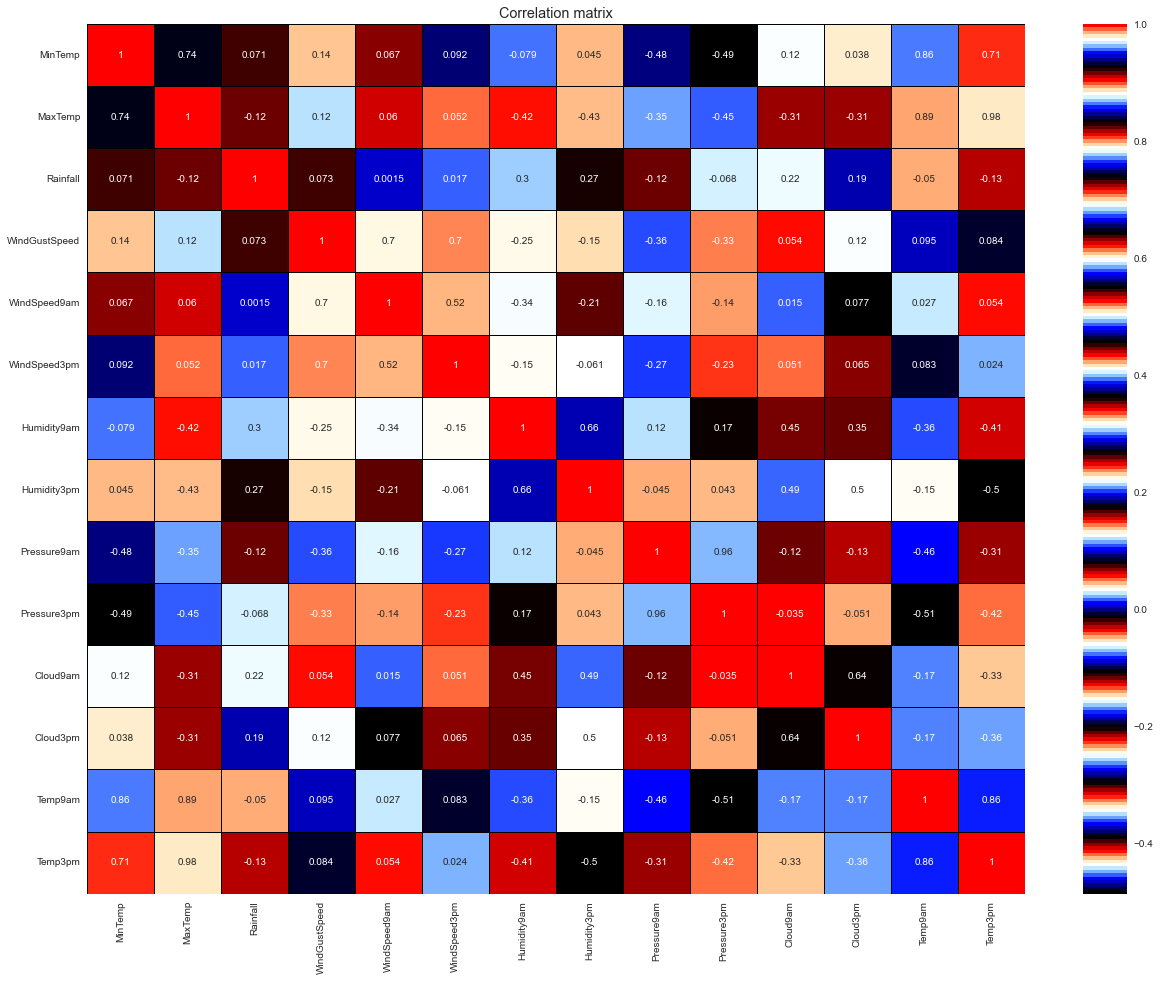

In [178]:
#Correalation using the Heatmap
plt.figure(figsize=(21,16))
sns.heatmap(df.corr(), annot =True, cmap='flag_r' , linecolor='black', linewidth=1,  robust=True)
plt.title('Correlation matrix')

### OUTLIERS


MinTemp             AxesSubplot(0.125,0.772143;0.168478x0.107857)
MaxTemp          AxesSubplot(0.327174,0.772143;0.168478x0.107857)
Rainfall         AxesSubplot(0.529348,0.772143;0.168478x0.107857)
WindGustSpeed    AxesSubplot(0.731522,0.772143;0.168478x0.107857)
WindSpeed9am        AxesSubplot(0.125,0.642714;0.168478x0.107857)
WindSpeed3pm     AxesSubplot(0.327174,0.642714;0.168478x0.107857)
Humidity9am      AxesSubplot(0.529348,0.642714;0.168478x0.107857)
Humidity3pm      AxesSubplot(0.731522,0.642714;0.168478x0.107857)
Pressure9am         AxesSubplot(0.125,0.513286;0.168478x0.107857)
Pressure3pm      AxesSubplot(0.327174,0.513286;0.168478x0.107857)
Cloud9am         AxesSubplot(0.529348,0.513286;0.168478x0.107857)
Cloud3pm         AxesSubplot(0.731522,0.513286;0.168478x0.107857)
Temp9am             AxesSubplot(0.125,0.383857;0.168478x0.107857)
Temp3pm          AxesSubplot(0.327174,0.383857;0.168478x0.107857)
dtype: object

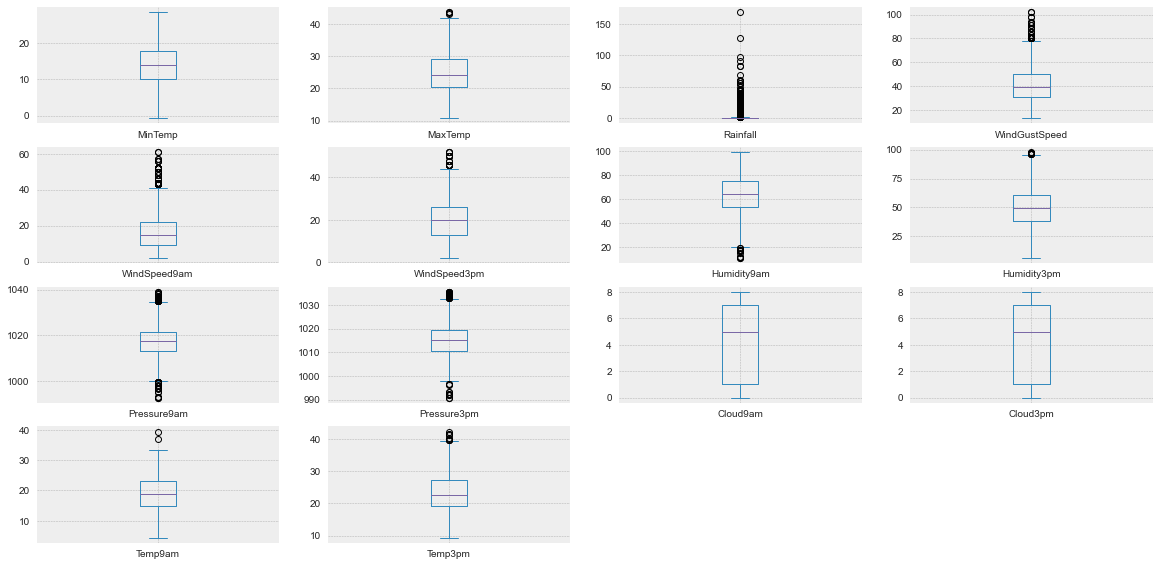

In [179]:
#Identifying the outliers
df.plot(kind='box',subplots=True,layout=(6,4),figsize=(20,15))

<AxesSubplot:>

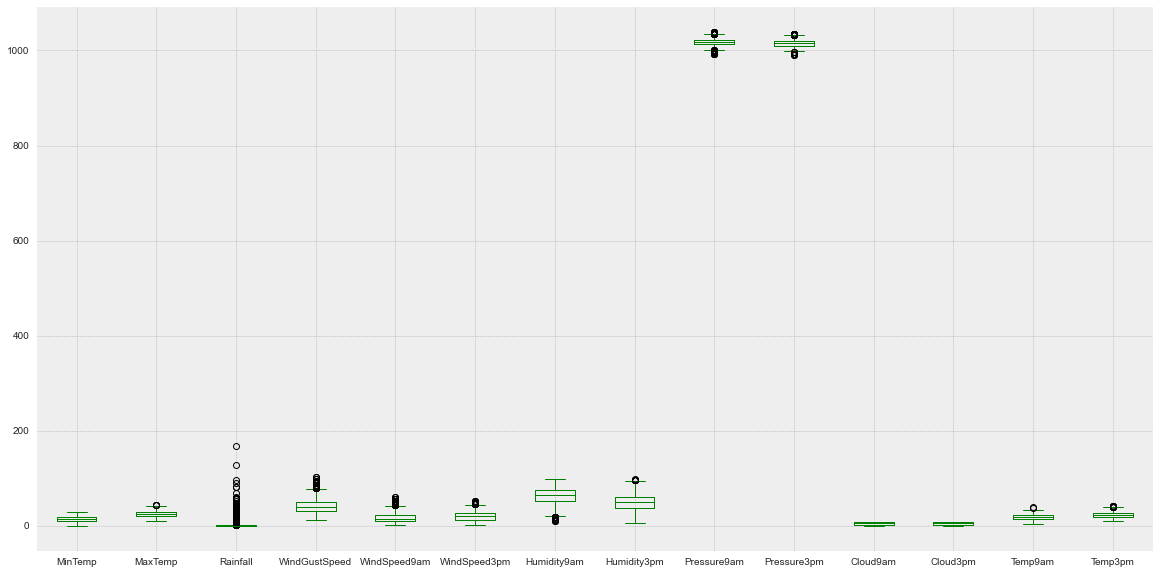

In [180]:
df.plot(kind="box", figsize = (20,10), color="g")

### Checking the skewness

In [181]:
df.skew()

MinTemp          0.039516
MaxTemp          0.237727
Rainfall         7.592966
WindGustSpeed    0.699143
WindSpeed9am     0.935658
WindSpeed3pm     0.356434
Humidity9am     -0.194562
Humidity3pm      0.174915
Pressure9am      0.032381
Pressure3pm      0.096222
Cloud9am        -0.128711
Cloud3pm        -0.155781
Temp9am          0.029503
Temp3pm          0.239057
dtype: float64

Rainfall, evaporation and windspeed9am are considerably skewed. Threshold= +/- 0.5

In [182]:
df.nunique() #the number of unique values in each column

Date             1873
MinTemp           249
MaxTemp           288
Rainfall          174
WindGustDir        16
WindGustSpeed      46
WindDir9am         16
WindDir3pm         16
WindSpeed9am       31
WindSpeed3pm       28
Humidity9am        86
Humidity3pm        93
Pressure9am       338
Pressure3pm       332
Cloud9am            9
Cloud3pm            9
Temp9am           266
Temp3pm           286
RainToday           2
RainTomorrow        2
dtype: int64

Interpreting Relationship between Independent and Dependent Variables


### Analyzing the Target Columns

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

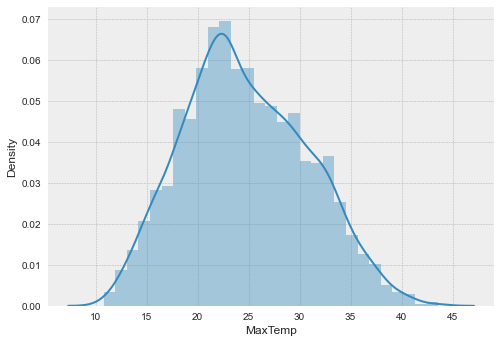

In [183]:
sns.distplot(df.MaxTemp)

In [184]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

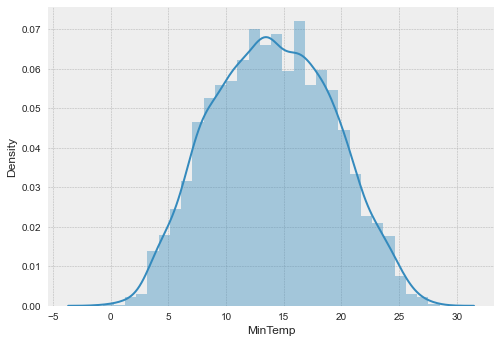

In [185]:
sns.distplot(df.MinTemp)

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

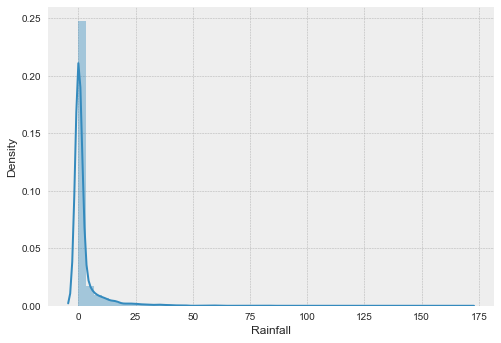

In [187]:
sns.distplot(df.Rainfall)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

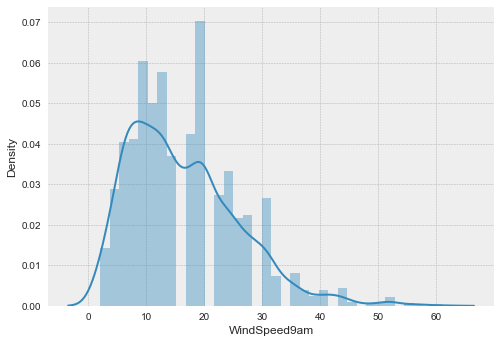

In [188]:
sns.distplot(df.WindSpeed9am)

<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

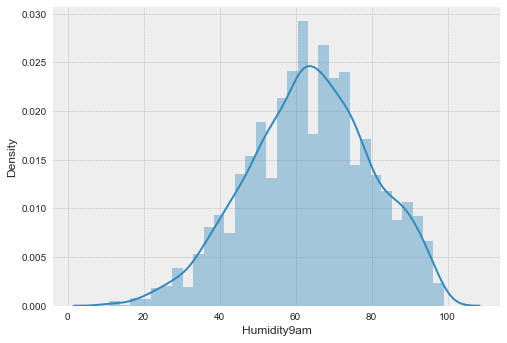

In [189]:
sns.distplot(df['Humidity9am'])

<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

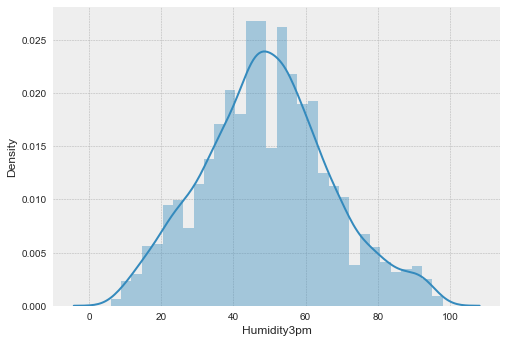

In [190]:
sns.distplot(df['Humidity3pm'])

<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

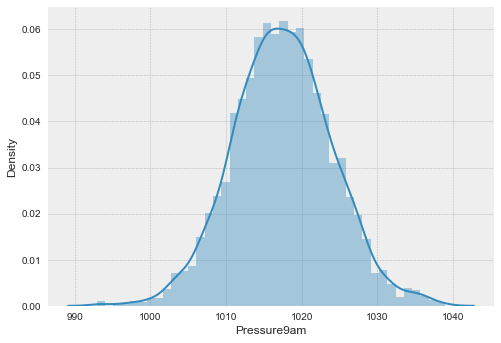

In [191]:
sns.distplot(df['Pressure9am'])

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

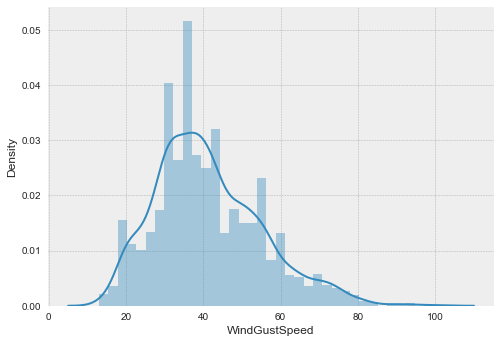

In [192]:
sns.distplot(df['WindGustSpeed'])

<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

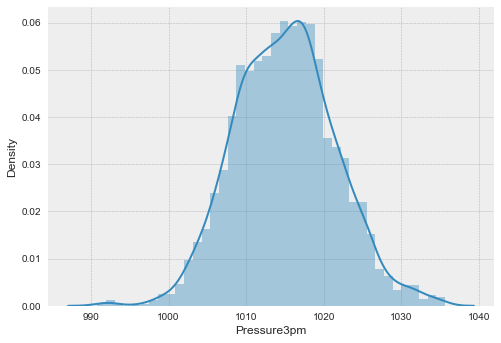

In [193]:
sns.distplot(df['Pressure3pm'])

<AxesSubplot:xlabel='Cloud9am', ylabel='Density'>

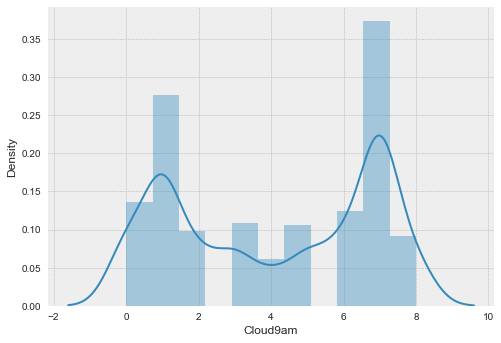

In [194]:
sns.distplot(df['Cloud9am'])

<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

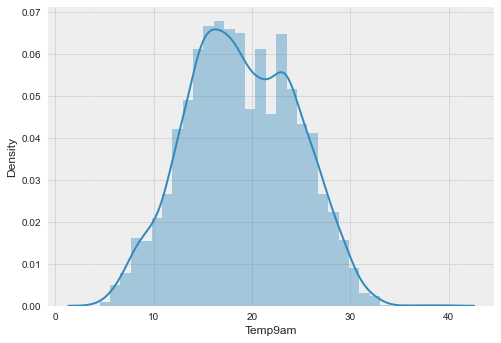

In [195]:
sns.distplot(df['Temp9am'])

### Analyzing the Feature Columns

In [196]:
df.dtypes[df.dtypes == 'object'] #Identifying the Categorical Columns

Date            object
WindGustDir     object
WindDir9am      object
WindDir3pm      object
RainToday       object
RainTomorrow    object
dtype: object

In [197]:
df.Date.unique()

array(['2009-03-10', '2009-03-11', '2009-03-12', ..., '2012-08-16',
       '2012-09-28', '2012-11-10'], dtype=object)

In [198]:
df.Date.value_counts()

2011-02-07    4
2011-03-25    4
2011-06-24    4
2011-06-27    4
2011-11-17    4
             ..
2011-02-11    1
2011-02-12    1
2011-02-23    1
2011-02-27    1
2012-11-10    1
Name: Date, Length: 1873, dtype: int64

### Extracting 'Day' and 'Month' and 'Year' columns from 'Date' Columnn

In [199]:
df['Date']=pd.to_datetime(df['Date']) #creating datetime type dataframe

df['Day']=df['Date'].apply(lambda d:d.day) #mapping day values to 'Day' column in main dataframe

df['Month']=df['Date'].apply(lambda m:m.month) #mapping month values to 'Month' column in main dataframe

df['Year']=df['Date'].apply(lambda y:y.year) #mapping month values to 'Year' column in main Date

df.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2009-03-10,19.8,27.1,24.4,ESE,35.0,SW,ESE,17.0,22.0,...,1017.9,6.0,6.0,22.0,26.0,Yes,Yes,10,3,2009
1,2009-03-11,18.7,25.6,6.8,E,33.0,SW,S,17.0,13.0,...,1020.1,4.0,7.0,21.0,20.9,Yes,Yes,11,3,2009
2,2009-03-12,16.5,25.5,16.8,WSW,19.0,WSW,ESE,6.0,9.0,...,1020.1,5.0,7.0,21.0,24.5,Yes,No,12,3,2009
3,2009-03-13,18.5,26.9,0.0,ENE,30.0,SW,ENE,7.0,20.0,...,1016.6,2.0,5.0,23.3,26.4,No,No,13,3,2009
4,2009-03-14,18.2,28.2,0.0,NNE,50.0,NNW,NE,13.0,35.0,...,1012.8,1.0,1.0,24.0,25.9,No,Yes,14,3,2009


In [200]:
df.dtypes[df.dtypes != 'object'] #Identifying non object type Columns


Date             datetime64[ns]
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustSpeed           float64
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
Day                       int64
Month                     int64
Year                      int64
dtype: object

In [201]:
df.nunique()

Date             1873
MinTemp           249
MaxTemp           288
Rainfall          174
WindGustDir        16
WindGustSpeed      46
WindDir9am         16
WindDir3pm         16
WindSpeed9am       31
WindSpeed3pm       28
Humidity9am        86
Humidity3pm        93
Pressure9am       338
Pressure3pm       332
Cloud9am            9
Cloud3pm            9
Temp9am           266
Temp3pm           286
RainToday           2
RainTomorrow        2
Day                31
Month              12
Year                8
dtype: int64

In [205]:
df.Rainfall.value_counts()

0.0     2565
0.2      153
0.4       77
1.2       44
0.6       43
        ... 
23.6       1
28.4       1
29.6       1
44.4       1
20.4       1
Name: Rainfall, Length: 174, dtype: int64

In [207]:
#Zscore method using Scipy
# Continuous features having outliers 
variables = df[['Pressure9am','WindSpeed9am']]

In [208]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(variables))
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2009-03-10,19.8,27.1,24.4,ESE,35.0,SW,ESE,17.0,22.0,...,1017.9,6.0,6.0,22.0,26.0,Yes,Yes,10,3,2009
1,2009-03-11,18.7,25.6,6.8,E,33.0,SW,S,17.0,13.0,...,1020.1,4.0,7.0,21.0,20.9,Yes,Yes,11,3,2009
2,2009-03-12,16.5,25.5,16.8,WSW,19.0,WSW,ESE,6.0,9.0,...,1020.1,5.0,7.0,21.0,24.5,Yes,No,12,3,2009
3,2009-03-13,18.5,26.9,0.0,ENE,30.0,SW,ENE,7.0,20.0,...,1016.6,2.0,5.0,23.3,26.4,No,No,13,3,2009
4,2009-03-14,18.2,28.2,0.0,NNE,50.0,NNW,NE,13.0,35.0,...,1012.8,1.0,1.0,24.0,25.9,No,Yes,14,3,2009


In [209]:
print(df.shape)
print(new_df.shape)

(3790, 23)
(3739, 23)


In [210]:
#Percent Data loss
# Let's check the the data loss
data_loss = (3790-3739)/3790*100
data_loss


1.345646437994723

In [211]:
# Checking the skewness
new_df.skew()

MinTemp          0.038271
MaxTemp          0.237401
Rainfall         7.699323
WindGustSpeed    0.679518
WindSpeed9am     0.659061
WindSpeed3pm     0.304031
Humidity9am     -0.201579
Humidity3pm      0.169246
Pressure9am      0.082456
Pressure3pm      0.157305
Cloud9am        -0.124999
Cloud3pm        -0.146411
Temp9am          0.028308
Temp3pm          0.239300
Day             -0.004039
Month            0.035912
Year             0.869029
dtype: float64

In [212]:
#Removing Skewness using power transform method
skewed_features = ["Rainfall","Humidity9am"]
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [213]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()

,Rainfall,Humidity9am
0,1.888752,1.205703
1,1.812330,1.338232
2,1.878495,1.271881
3,-0.643294,0.235179
4,-0.643294,0.172041


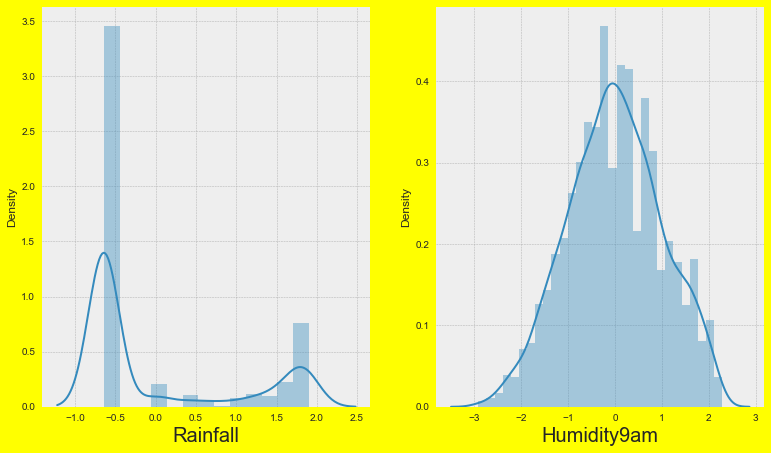

In [214]:
#Distribution after removing the skewness
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in new_df[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [215]:
# Now let's check the skewness
new_df.skew()

MinTemp          0.038271
MaxTemp          0.237401
Rainfall         1.059029
WindGustSpeed    0.679518
WindSpeed9am     0.659061
WindSpeed3pm     0.304031
Humidity9am     -0.048754
Humidity3pm      0.169246
Pressure9am      0.082456
Pressure3pm      0.157305
Cloud9am        -0.124999
Cloud3pm        -0.146411
Temp9am          0.028308
Temp3pm          0.239300
Day             -0.004039
Month            0.035912
Year             0.869029
dtype: float64

### Encoding the dataset

In [216]:
from sklearn.preprocessing import LabelEncoder
for column in df:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])
df

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2009-03-10,19.8,27.1,24.4,2,35.0,12,2,17.0,22.0,...,1017.9,6.0,6.0,22.0,26.0,1,1,10,3,2009
1,2009-03-11,18.7,25.6,6.8,0,33.0,12,8,17.0,13.0,...,1020.1,4.0,7.0,21.0,20.9,1,1,11,3,2009
2,2009-03-12,16.5,25.5,16.8,15,19.0,15,2,6.0,9.0,...,1020.1,5.0,7.0,21.0,24.5,1,0,12,3,2009
3,2009-03-13,18.5,26.9,0.0,1,30.0,12,1,7.0,20.0,...,1016.6,2.0,5.0,23.3,26.4,0,0,13,3,2009
4,2009-03-14,18.2,28.2,0.0,5,50.0,6,4,13.0,35.0,...,1012.8,1.0,1.0,24.0,25.9,0,1,14,3,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,2012-11-06,25.2,34.5,3.0,5,39.0,3,5,11.0,22.0,...,1007.9,7.0,7.0,29.6,33.4,1,0,6,11,2012
3786,2012-11-07,26.2,33.3,0.0,3,54.0,1,0,13.0,13.0,...,1006.8,4.0,8.0,30.2,25.2,0,1,7,11,2012
3787,2012-11-08,24.9,32.8,20.4,14,37.0,5,7,13.0,20.0,...,1006.2,4.0,6.0,29.5,32.0,1,0,8,11,2012
3788,2012-11-09,25.5,33.1,0.0,10,37.0,0,15,20.0,13.0,...,1006.9,7.0,7.0,28.6,31.5,0,0,9,11,2012


#### Target/ Label column ('RainTomorrow') has Categorical type of Data.

#### Classification Models will be used here


### Encoding the Label Column.
Encoding the categorical data using Label Encoding Technique

In [217]:


from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()
df['RainTomorrow'] = labenc.fit_transform(df['RainTomorrow'])
df


,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2009-03-10,19.8,27.1,24.4,2,35.0,12,2,17.0,22.0,...,1017.9,6.0,6.0,22.0,26.0,1,1,10,3,2009
1,2009-03-11,18.7,25.6,6.8,0,33.0,12,8,17.0,13.0,...,1020.1,4.0,7.0,21.0,20.9,1,1,11,3,2009
2,2009-03-12,16.5,25.5,16.8,15,19.0,15,2,6.0,9.0,...,1020.1,5.0,7.0,21.0,24.5,1,0,12,3,2009
3,2009-03-13,18.5,26.9,0.0,1,30.0,12,1,7.0,20.0,...,1016.6,2.0,5.0,23.3,26.4,0,0,13,3,2009
4,2009-03-14,18.2,28.2,0.0,5,50.0,6,4,13.0,35.0,...,1012.8,1.0,1.0,24.0,25.9,0,1,14,3,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,2012-11-06,25.2,34.5,3.0,5,39.0,3,5,11.0,22.0,...,1007.9,7.0,7.0,29.6,33.4,1,0,6,11,2012
3786,2012-11-07,26.2,33.3,0.0,3,54.0,1,0,13.0,13.0,...,1006.8,4.0,8.0,30.2,25.2,0,1,7,11,2012
3787,2012-11-08,24.9,32.8,20.4,14,37.0,5,7,13.0,20.0,...,1006.2,4.0,6.0,29.5,32.0,1,0,8,11,2012
3788,2012-11-09,25.5,33.1,0.0,10,37.0,0,15,20.0,13.0,...,1006.9,7.0,7.0,28.6,31.5,0,0,9,11,2012


In [219]:
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()
df['WindGustDir'] = labenc.fit_transform(df['WindGustDir'])
df

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2009-03-10,19.8,27.1,24.4,2,35.0,12,2,17.0,22.0,...,1017.9,6.0,6.0,22.0,26.0,1,1,10,3,2009
1,2009-03-11,18.7,25.6,6.8,0,33.0,12,8,17.0,13.0,...,1020.1,4.0,7.0,21.0,20.9,1,1,11,3,2009
2,2009-03-12,16.5,25.5,16.8,15,19.0,15,2,6.0,9.0,...,1020.1,5.0,7.0,21.0,24.5,1,0,12,3,2009
3,2009-03-13,18.5,26.9,0.0,1,30.0,12,1,7.0,20.0,...,1016.6,2.0,5.0,23.3,26.4,0,0,13,3,2009
4,2009-03-14,18.2,28.2,0.0,5,50.0,6,4,13.0,35.0,...,1012.8,1.0,1.0,24.0,25.9,0,1,14,3,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,2012-11-06,25.2,34.5,3.0,5,39.0,3,5,11.0,22.0,...,1007.9,7.0,7.0,29.6,33.4,1,0,6,11,2012
3786,2012-11-07,26.2,33.3,0.0,3,54.0,1,0,13.0,13.0,...,1006.8,4.0,8.0,30.2,25.2,0,1,7,11,2012
3787,2012-11-08,24.9,32.8,20.4,14,37.0,5,7,13.0,20.0,...,1006.2,4.0,6.0,29.5,32.0,1,0,8,11,2012
3788,2012-11-09,25.5,33.1,0.0,10,37.0,0,15,20.0,13.0,...,1006.9,7.0,7.0,28.6,31.5,0,0,9,11,2012


In [221]:
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()
df['WindDir9am'] = labenc.fit_transform(df['WindDir9am'])
df

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2009-03-10,19.8,27.1,24.4,2,35.0,12,2,17.0,22.0,...,1017.9,6.0,6.0,22.0,26.0,1,1,10,3,2009
1,2009-03-11,18.7,25.6,6.8,0,33.0,12,8,17.0,13.0,...,1020.1,4.0,7.0,21.0,20.9,1,1,11,3,2009
2,2009-03-12,16.5,25.5,16.8,15,19.0,15,2,6.0,9.0,...,1020.1,5.0,7.0,21.0,24.5,1,0,12,3,2009
3,2009-03-13,18.5,26.9,0.0,1,30.0,12,1,7.0,20.0,...,1016.6,2.0,5.0,23.3,26.4,0,0,13,3,2009
4,2009-03-14,18.2,28.2,0.0,5,50.0,6,4,13.0,35.0,...,1012.8,1.0,1.0,24.0,25.9,0,1,14,3,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,2012-11-06,25.2,34.5,3.0,5,39.0,3,5,11.0,22.0,...,1007.9,7.0,7.0,29.6,33.4,1,0,6,11,2012
3786,2012-11-07,26.2,33.3,0.0,3,54.0,1,0,13.0,13.0,...,1006.8,4.0,8.0,30.2,25.2,0,1,7,11,2012
3787,2012-11-08,24.9,32.8,20.4,14,37.0,5,7,13.0,20.0,...,1006.2,4.0,6.0,29.5,32.0,1,0,8,11,2012
3788,2012-11-09,25.5,33.1,0.0,10,37.0,0,15,20.0,13.0,...,1006.9,7.0,7.0,28.6,31.5,0,0,9,11,2012


In [222]:
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()
df['WindDir3pm'] = labenc.fit_transform(df['WindDir3pm'])
df

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2009-03-10,19.8,27.1,24.4,2,35.0,12,2,17.0,22.0,...,1017.9,6.0,6.0,22.0,26.0,1,1,10,3,2009
1,2009-03-11,18.7,25.6,6.8,0,33.0,12,8,17.0,13.0,...,1020.1,4.0,7.0,21.0,20.9,1,1,11,3,2009
2,2009-03-12,16.5,25.5,16.8,15,19.0,15,2,6.0,9.0,...,1020.1,5.0,7.0,21.0,24.5,1,0,12,3,2009
3,2009-03-13,18.5,26.9,0.0,1,30.0,12,1,7.0,20.0,...,1016.6,2.0,5.0,23.3,26.4,0,0,13,3,2009
4,2009-03-14,18.2,28.2,0.0,5,50.0,6,4,13.0,35.0,...,1012.8,1.0,1.0,24.0,25.9,0,1,14,3,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,2012-11-06,25.2,34.5,3.0,5,39.0,3,5,11.0,22.0,...,1007.9,7.0,7.0,29.6,33.4,1,0,6,11,2012
3786,2012-11-07,26.2,33.3,0.0,3,54.0,1,0,13.0,13.0,...,1006.8,4.0,8.0,30.2,25.2,0,1,7,11,2012
3787,2012-11-08,24.9,32.8,20.4,14,37.0,5,7,13.0,20.0,...,1006.2,4.0,6.0,29.5,32.0,1,0,8,11,2012
3788,2012-11-09,25.5,33.1,0.0,10,37.0,0,15,20.0,13.0,...,1006.9,7.0,7.0,28.6,31.5,0,0,9,11,2012


In [223]:
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()
df['RainToday'] = labenc.fit_transform(df['RainToday'])
df

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2009-03-10,19.8,27.1,24.4,2,35.0,12,2,17.0,22.0,...,1017.9,6.0,6.0,22.0,26.0,1,1,10,3,2009
1,2009-03-11,18.7,25.6,6.8,0,33.0,12,8,17.0,13.0,...,1020.1,4.0,7.0,21.0,20.9,1,1,11,3,2009
2,2009-03-12,16.5,25.5,16.8,15,19.0,15,2,6.0,9.0,...,1020.1,5.0,7.0,21.0,24.5,1,0,12,3,2009
3,2009-03-13,18.5,26.9,0.0,1,30.0,12,1,7.0,20.0,...,1016.6,2.0,5.0,23.3,26.4,0,0,13,3,2009
4,2009-03-14,18.2,28.2,0.0,5,50.0,6,4,13.0,35.0,...,1012.8,1.0,1.0,24.0,25.9,0,1,14,3,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,2012-11-06,25.2,34.5,3.0,5,39.0,3,5,11.0,22.0,...,1007.9,7.0,7.0,29.6,33.4,1,0,6,11,2012
3786,2012-11-07,26.2,33.3,0.0,3,54.0,1,0,13.0,13.0,...,1006.8,4.0,8.0,30.2,25.2,0,1,7,11,2012
3787,2012-11-08,24.9,32.8,20.4,14,37.0,5,7,13.0,20.0,...,1006.2,4.0,6.0,29.5,32.0,1,0,8,11,2012
3788,2012-11-09,25.5,33.1,0.0,10,37.0,0,15,20.0,13.0,...,1006.9,7.0,7.0,28.6,31.5,0,0,9,11,2012


In [231]:
dumm = pd.get_dummies(X[['WindGustDir','WindDir9am','WindDir3pm','RainToday']],drop_first = False)
dumm

,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,2,12,2,1
1,0,12,8,1
2,15,15,2,1
3,1,12,1,0
4,5,6,4,0
...,...,...,...,...
3785,5,3,5,1
3786,3,1,0,0
3787,14,5,7,1
3788,10,0,15,0


#### Splitting the data set for prediction

In [234]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

### Classification Model Building

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)
y_train

39      1
830     0
496     0
2514    0
2358    0
       ..
2974    1
2669    0
1697    1
132     0
1369    0
Name: RainTomorrow, Length: 3032, dtype: int64

In [238]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [239]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 2321, 1: 711})
The number of classes after fit Counter({1: 2321, 0: 2321})


In [243]:
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [244]:
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[549  31]
 [ 45 133]]
0.899736147757256
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       580
           1       0.81      0.75      0.78       178

    accuracy                           0.90       758
   macro avg       0.87      0.85      0.86       758
weighted avg       0.90      0.90      0.90       758



0.846871367686943

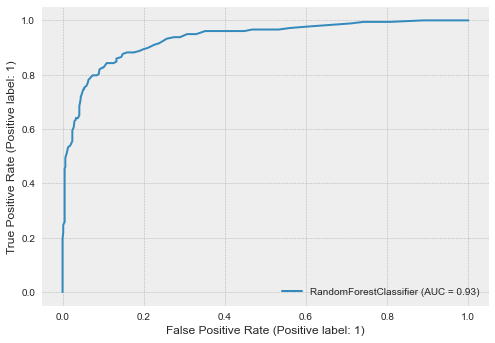

In [245]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [246]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

In [247]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[466 114]
 [ 34 144]]
0.8047493403693932
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       580
           1       0.56      0.81      0.66       178

    accuracy                           0.80       758
   macro avg       0.75      0.81      0.76       758
weighted avg       0.84      0.80      0.82       758



0.8062185199535064

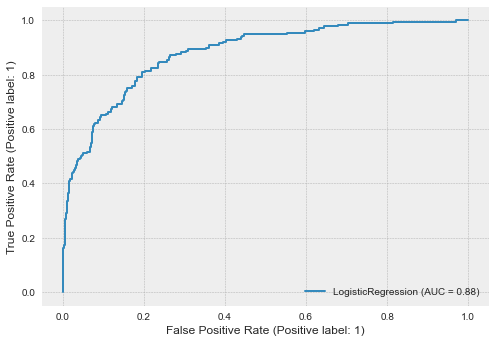

In [248]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None) 

In [249]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)


GaussianNB()

In [250]:

y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[452 128]
 [ 50 128]]
0.7651715039577837
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       580
           1       0.50      0.72      0.59       178

    accuracy                           0.77       758
   macro avg       0.70      0.75      0.71       758
weighted avg       0.81      0.77      0.78       758



0.7492057342115459

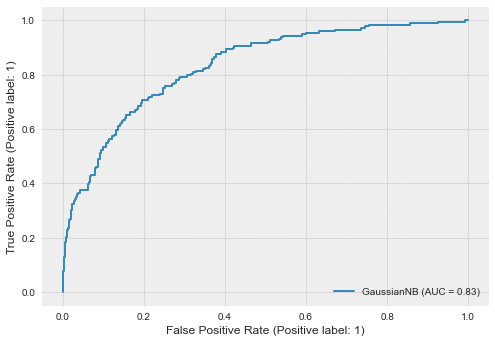

In [251]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None) 

In [252]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [253]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[471 109]
 [ 44 134]]
0.7981530343007915
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       580
           1       0.55      0.75      0.64       178

    accuracy                           0.80       758
   macro avg       0.73      0.78      0.75       758
weighted avg       0.83      0.80      0.81       758



0.7824389771406431

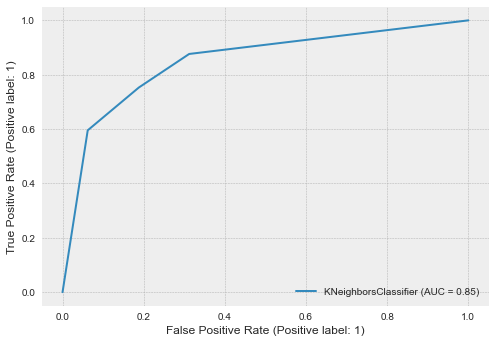

In [254]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None) 

In [255]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [256]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[545  35]
 [ 51 127]]
0.8865435356200527
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       580
           1       0.78      0.71      0.75       178

    accuracy                           0.89       758
   macro avg       0.85      0.83      0.84       758
weighted avg       0.88      0.89      0.88       758



0.8265691592406045

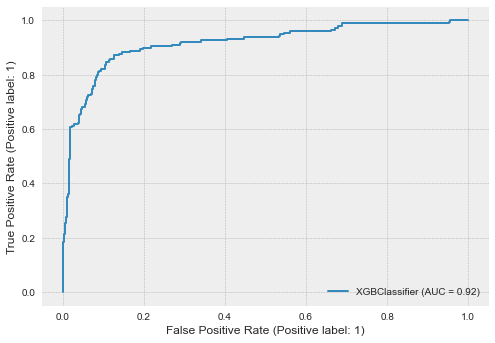

In [257]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None) 

In [258]:
svc = SVC()
svc.fit(X_train_res, y_train_res)



SVC()

In [259]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))


[[461 119]
 [ 44 134]]
0.7849604221635884
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       580
           1       0.53      0.75      0.62       178

    accuracy                           0.78       758
   macro avg       0.72      0.77      0.74       758
weighted avg       0.82      0.78      0.80       758



0.7738182874854707

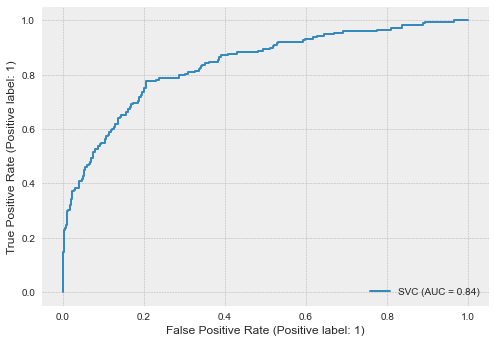

In [260]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None) 

In [261]:
# joblib.dump(rf, "rf.pkl")
# joblib.dump(cat, "cat.pkl")
# joblib.dump(logreg, "logreg.pkl")
# joblib.dump(gnb, "gnb.pkl")
# joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(xgb, "xgb.pkl")

['xgb.pkl']

Best results by Random Forest Classifier 0.899736147757256 i.e. approximately 90%